In [1]:
pip install scikit-learn xgboost matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.3/150.0 MB 4.5 MB/s eta 0:00:34
   - -------------------------------------- 4.7/150.0 MB 7.7 MB/s eta 0:00:19
   - -------------------------------------- 7.1/150.0 MB 8.4 MB/s eta 0:00:18
   -- ------------------------------------- 9.2/150.0 MB 8.8 MB/s eta 0:00:17
   --- ------------------------------------ 11.3/150.0 MB 9.1 MB/s eta 0:00:16
   --- ------------------------------------ 13.6/150.0 MB 9.4 MB/s eta 0:00:15
   ---- ----------------------------------- 15.7/150.0 MB 9.5 MB/s eta 0:00:15
   ---- ----------------------------------- 18.1/150.0 MB 9.7 MB/s eta 0:00:14
   ----- ---------------------------------- 20.4/150.0 MB 9.9 MB/s eta 0:0

Обработка 50000 строк...
Время обучения: 0.78 секунд

Обработка 100000 строк...
Время обучения: 0.88 секунд

Обработка 250000 строк...
Время обучения: 1.67 секунд

Обработка 500000 строк...
Время обучения: 3.28 секунд

Обработка 750000 строк...
Время обучения: 4.92 секунд

Обработка 1000000 строк...
Время обучения: 6.49 секунд



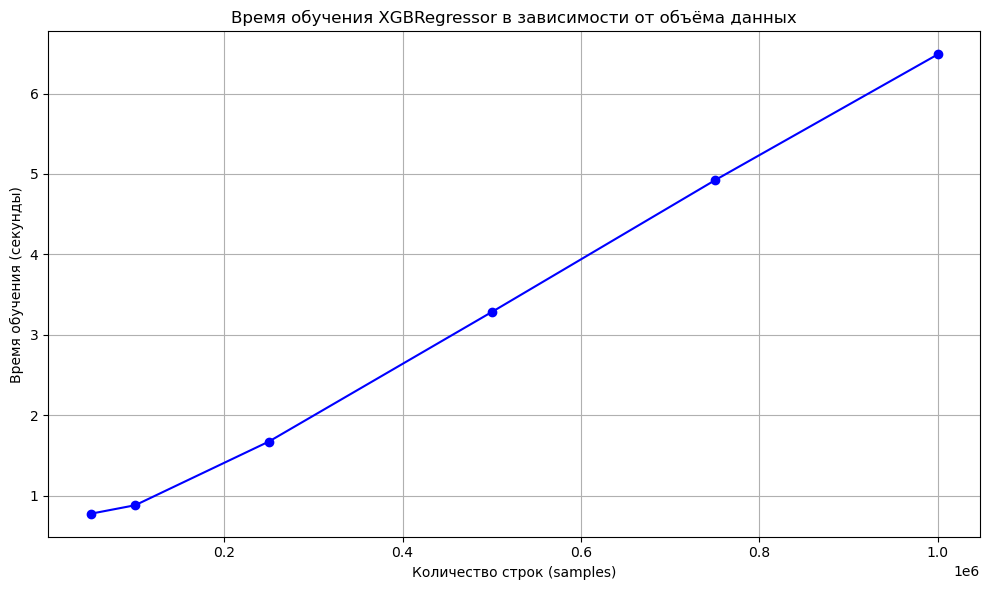

In [1]:

import numpy as np
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from time import time

def measure_fit_time(n_samples_list, n_features=20):
    times = []

    for n in n_samples_list:
        print(f"Обработка {n} строк...")
        X, y = make_regression(n_samples=n, n_features=n_features, noise=0.1)

        model = XGBRegressor(n_jobs=-1, tree_method='hist', verbosity=0)

        start = time()
        model.fit(X, y)
        duration = time() - start
        times.append(duration)
        print(f"Время обучения: {duration:.2f} секунд\n")

    return times

# Объёмы данных для теста
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# Замер времени
fit_times = measure_fit_time(samples)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(samples, fit_times, marker='o', color='blue')
plt.title('Время обучения XGBRegressor в зависимости от объёма данных')
plt.xlabel('Количество строк (samples)')
plt.ylabel('Время обучения (секунды)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.datasets import make_regression
from time import time

X, y = make_regression(n_samples=1_000_000, n_features=20, noise=0.1)
model = XGBRegressor(n_jobs=-1, tree_method="hist")  # Используем все потоки

start = time()
model.fit(X, y)
print("Time:", round(time() - start, 2), "seconds")


Time: 6.34 seconds


Обработка 50000 строк...
Время обучения: 0.64 секунд

Обработка 100000 строк...
Время обучения: 0.93 секунд

Обработка 250000 строк...
Время обучения: 1.67 секунд

Обработка 500000 строк...
Время обучения: 3.22 секунд

Обработка 750000 строк...
Время обучения: 4.77 секунд

Обработка 1000000 строк...
Время обучения: 6.36 секунд

✅ Результаты сохранены в xgboost_fit_benchmark.csv


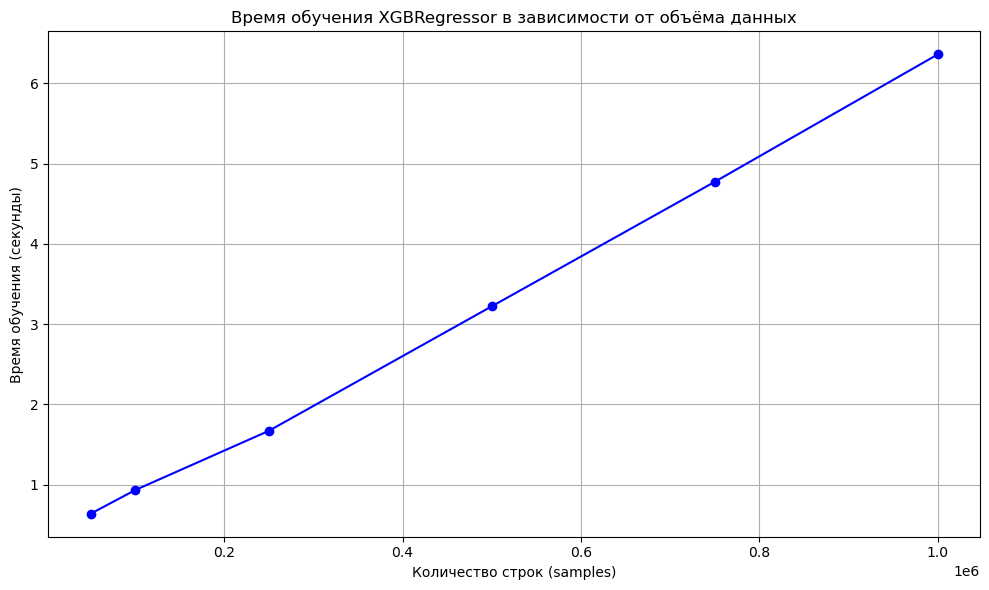

In [7]:
import numpy as np
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from time import time
import csv
from datetime import datetime
import platform

def measure_fit_time(n_samples_list, n_features=20):
    times = []

    for n in n_samples_list:
        print(f"Обработка {n} строк...")
        X, y = make_regression(n_samples=n, n_features=n_features, noise=0.1)

        model = XGBRegressor(n_jobs=-1, tree_method='hist', verbosity=0)

        start = time()
        model.fit(X, y)
        duration = time() - start
        times.append((n, duration))
        print(f"Время обучения: {duration:.2f} секунд\n")

    return times

def export_to_csv(results, filename="xgboost_fit_benchmark.csv"):
    cpu_name = platform.processor()
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([f"# Test started: {timestamp}, CPU: {cpu_name}"])
        writer.writerow(["n_samples", "fit_time_seconds"])
        for n, t in results:
            writer.writerow([n, round(t, 4)])
        writer.writerow([])

    print(f"✅ Результаты сохранены в {filename}")

def plot_results(results):
    samples = [x[0] for x in results]
    times = [x[1] for x in results]

    plt.figure(figsize=(10, 6))
    plt.plot(samples, times, marker='o', color='blue')
    plt.title('Время обучения XGBRegressor в зависимости от объёма данных')
    plt.xlabel('Количество строк (samples)')
    plt.ylabel('Время обучения (секунды)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Объёмы данных
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# Запуск замеров
fit_results = measure_fit_time(samples)

# Экспорт в CSV
export_to_csv(fit_results)

# Построение графика
plot_results(fit_results)


Обработка 50000 строк...
Время обучения (GPU): 1.24 секунд

Обработка 100000 строк...
Время обучения (GPU): 1.38 секунд

Обработка 250000 строк...
Время обучения (GPU): 2.31 секунд

Обработка 500000 строк...
Время обучения (GPU): 3.72 секунд

Обработка 750000 строк...
Время обучения (GPU): 4.99 секунд

Обработка 1000000 строк...
Время обучения (GPU): 6.27 секунд

✅ Результаты сохранены в xgboost_gpu_benchmark.csv


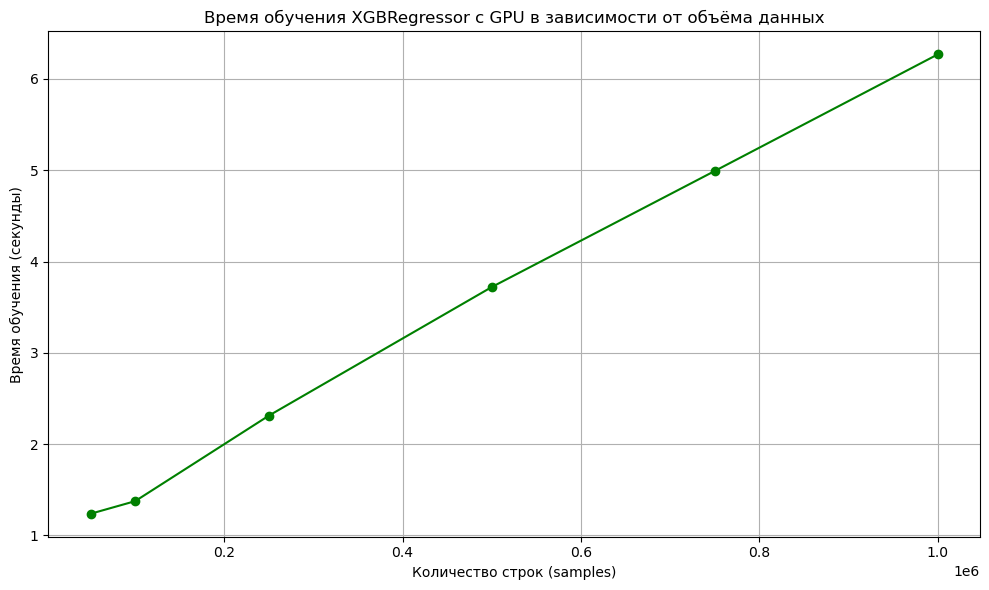

In [7]:
import numpy as np
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from time import time
import csv
from datetime import datetime
import platform
import subprocess

def get_gpu_name():
    try:
        output = subprocess.check_output(["nvidia-smi", "--query-gpu=name", "--format=csv,noheader"])
        return output.decode('utf-8').strip()
    except Exception:
        return "GPU неизвестен или отсутствует"

def measure_fit_time(n_samples_list, n_features=20):
    times = []

    for n in n_samples_list:
        print(f"Обработка {n} строк...")
        X, y = make_regression(n_samples=n, n_features=n_features, noise=0.1)

        model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', n_jobs=-1, verbosity=0)

        start = time()
        model.fit(X, y)
        duration = time() - start
        times.append((n, duration))
        print(f"Время обучения (GPU): {duration:.2f} секунд\n")

    return times

def export_to_csv(results, filename="xgboost_gpu_benchmark.csv"):
    gpu_name = get_gpu_name()
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([f"# Test started: {timestamp}, GPU: {gpu_name}"])
        writer.writerow(["n_samples", "fit_time_seconds"])
        for n, t in results:
            writer.writerow([n, round(t, 4)])
        writer.writerow([])

    print(f"✅ Результаты сохранены в {filename}")

def plot_results(results):
    samples = [x[0] for x in results]
    times = [x[1] for x in results]

    plt.figure(figsize=(10, 6))
    plt.plot(samples, times, marker='o', color='green')
    plt.title('Время обучения XGBRegressor с GPU в зависимости от объёма данных')
    plt.xlabel('Количество строк (samples)')
    plt.ylabel('Время обучения (секунды)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Объёмы данных
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# Запуск замеров
fit_results = measure_fit_time(samples)

# Экспорт в CSV
export_to_csv(fit_results)

# Построение графика
plot_results(fit_results)


In [11]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Сгенерируем данные
X, y = make_regression(n_samples=10000, n_features=20, noise=0.1)

# Создадим модель с GPU
model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', verbosity=1)

# Обучим модель
model.fit(X, y)

# Проверим параметры бустера
booster = model.get_booster()
print("Используемые атрибуты модели:")
print(booster.attributes())


C:\Users\fred1\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:20:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\fred1\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:20:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Используемые атрибуты модели:
{}


In [3]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Данные
X, y = make_regression(n_samples=10000, n_features=20, noise=0.1)

# Модель с GPU
model = XGBRegressor(tree_method='hist', device='cuda', verbosity=1)

# Обучение
model.fit(X, y)

# Проверим параметры бустера
booster = model.get_booster()
print("Используемые атрибуты модели:")
print(booster.attributes())

# Проверка (в новой версии нет нужных атрибутов, но должна быть строка про GPU в логе)
print("✅ Обучение завершено. Проверь вывод выше — должно быть указание на использование GPU.")



Используемые атрибуты модели:
{}
✅ Обучение завершено. Проверь вывод выше — должно быть указание на использование GPU.


эта модель GPU -  NVIDIA GeForce GTX 750 Ti вероятнее всего не поддерживает ML из-за старой архитектуры: 
GTX 750 Ti основана на архитектуре Maxwell 1-го поколения (sm_50),
Начиная с XGBoost 2.0, используется официальный CUDA backend через [Treelite/TVM], 
и требуется архитектура не ниже sm_60 (Pascal и новее).


In [17]:
pip install xgboost --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Обработка 50000 строк...
Время обучения (CPU): 0.85 секунд

Обработка 100000 строк...
Время обучения (CPU): 1.13 секунд

Обработка 250000 строк...
Время обучения (CPU): 1.89 секунд

Обработка 500000 строк...
Время обучения (CPU): 3.81 секунд

Обработка 750000 строк...
Время обучения (CPU): 5.27 секунд

Обработка 1000000 строк...
Время обучения (CPU): 6.53 секунд

Обработка 50000 строк...
Время обучения (CUDA): 1.24 секунд

Обработка 100000 строк...
Время обучения (CUDA): 1.38 секунд

Обработка 250000 строк...
Время обучения (CUDA): 2.35 секунд

Обработка 500000 строк...
Время обучения (CUDA): 3.70 секунд

Обработка 750000 строк...
Время обучения (CUDA): 5.02 секунд

Обработка 1000000 строк...
Время обучения (CUDA): 6.45 секунд

✅ Результаты сохранены в xgboost_fit_benchmark_v2.csv
✅ Результаты сохранены в xgboost_fit_benchmark_v2.csv


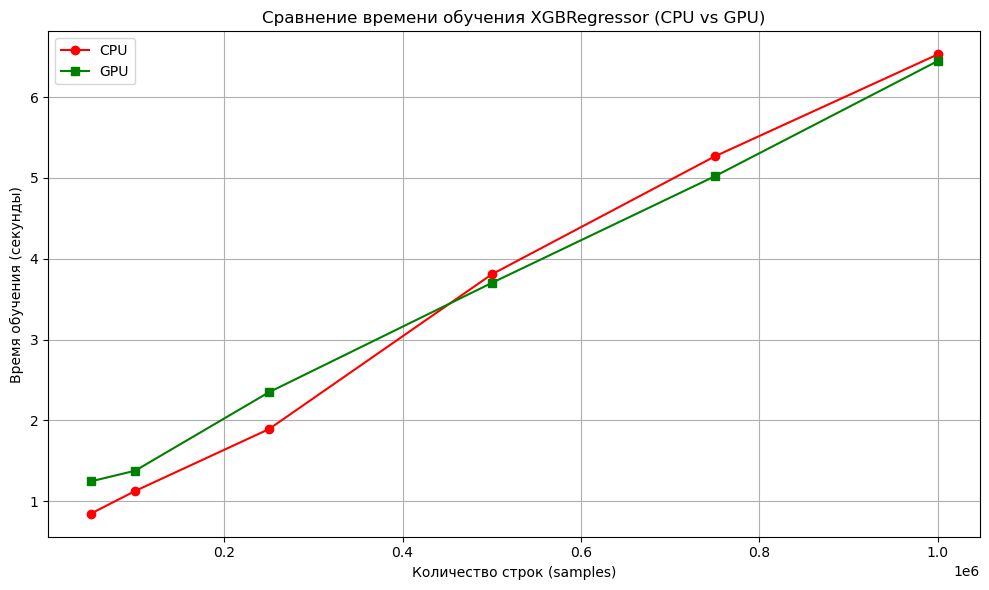

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from time import time
import csv
from datetime import datetime
import platform
import subprocess

def get_gpu_name():
    try:
        result = subprocess.run(['nvidia-smi', '--query-gpu=name', '--format=csv,noheader'],
                                capture_output=True, text=True)
        return result.stdout.strip()
    except Exception:
        return "GPU не обнаружен или nvidia-smi не установлен"

def measure_fit_time(n_samples_list, device='cpu', n_features=20):
    times = []

    for n in n_samples_list:
        print(f"Обработка {n} строк...")
        X, y = make_regression(n_samples=n, n_features=n_features, noise=0.1)

        model = XGBRegressor(
            n_jobs=-1,
            tree_method='hist',
            device=device,       # GPU или CPU
            verbosity=0
        )

        start = time()
        model.fit(X, y)
        duration = time() - start
        times.append((n, duration))
        print(f"Время обучения ({device.upper()}): {duration:.2f} секунд\n")

    return times

def export_to_csv(results, device="cpu", filename="xgboost_fit_benchmark_v2.csv"):
    hardware_info = get_gpu_name() if device == "cuda" else platform.processor()
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([f"# Тест запущен: {timestamp}, Устройство: {hardware_info}, Метод: {device.upper()}"])
        writer.writerow(["n_samples", "fit_time_seconds"])
        for n, t in results:
            writer.writerow([n, round(t, 4)])
        writer.writerow([])

    print(f"✅ Результаты сохранены в {filename}")

def plot_results(cpu_results, gpu_results):
    cpu_samples = [x[0] for x in cpu_results]
    cpu_times = [x[1] for x in cpu_results]
    gpu_times = [x[1] for x in gpu_results]

    plt.figure(figsize=(10, 6))
    plt.plot(cpu_samples, cpu_times, marker='o', label='CPU', color='red')
    plt.plot(cpu_samples, gpu_times, marker='s', label='GPU', color='green')
    plt.title('Сравнение времени обучения XGBRegressor (CPU vs GPU)')
    plt.xlabel('Количество строк (samples)')
    plt.ylabel('Время обучения (секунды)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Заданные объёмы данных
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# Замеры
cpu_results = measure_fit_time(samples, device='cpu')
gpu_results = measure_fit_time(samples, device='cuda')

# Сохранение
export_to_csv(cpu_results, device='cpu')
export_to_csv(gpu_results, device='cuda')

# График
plot_results(cpu_results, gpu_results)
